<a href="https://colab.research.google.com/github/buwituze/Sentiment-Analysis_Group-5/blob/main/Sentiment_Analysis_Group_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Sentiment_analysis/IMDB Dataset.csv")

print(df.shape)
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Exploration, Processing, and Visualization

In [5]:
print("Dataset Information:")
print(df.info())
print("\n" + "="*60)

print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())
print("\n" + "="*60)

# Handle missing data (Fill-in with placeholder text)
print("\nMissing Data Analysis:")
missing_counts = df.isnull().sum()
print(missing_counts)
print(f"\nTotal missing values: {missing_counts.sum()}")

if missing_counts.sum() > 0:
    print(f"\nFound {missing_counts.sum()} missing values")


    if missing_counts.sum() < 100:
        df = df.dropna()
        print(f"Dropped {missing_counts.sum()} rows (< 0.2% of data)")
    else:
        df['review'] = df['review'].fillna('')
        df['sentiment'] = df['sentiment'].fillna('unknown')
        print("Filled missing values with placeholders")

    print(f"New shape: {df.shape}")
else:
    print(" No missing values found - dataset is clean!")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


Missing Data Analysis:
review       0
sentiment    0
dtype: int64

Total missing values: 0
 No missing values found - dataset is clean!


/tmp/ipython-input-2146094360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


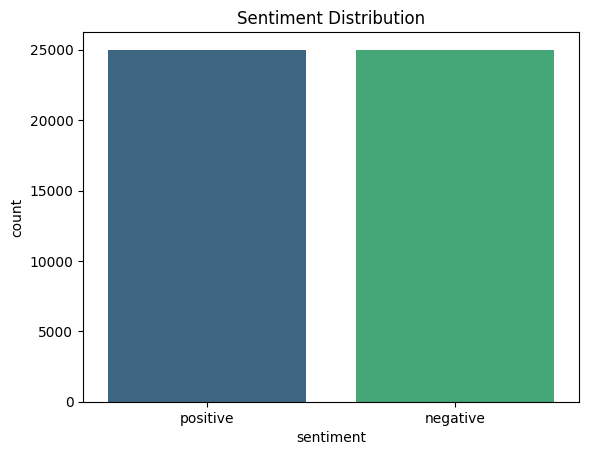

In [6]:
# class Distribution Visualization
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title("Sentiment Distribution")
plt.show()

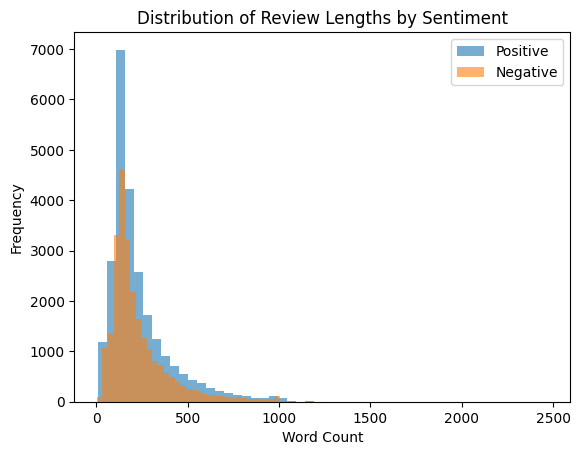

In [7]:
# View Length Distribution
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

plt.hist(df[df['sentiment']=="positive"]['review_length'], bins=50, alpha=0.6, label="Positive")
plt.hist(df[df['sentiment']=="negative"]['review_length'], bins=50, alpha=0.6, label="Negative")
plt.legend()
plt.title("Distribution of Review Lengths by Sentiment")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-293554118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='review_length', palette='Set2')


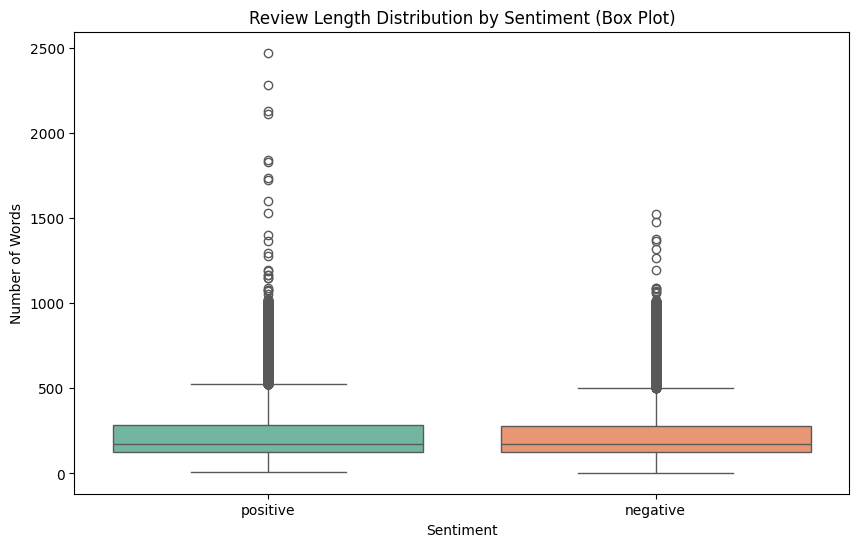

In [8]:
# Review Length Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='review_length', palette='Set2')
plt.title('Review Length Distribution by Sentiment (Box Plot)')
plt.ylabel('Number of Words')
plt.xlabel('Sentiment')
plt.show()

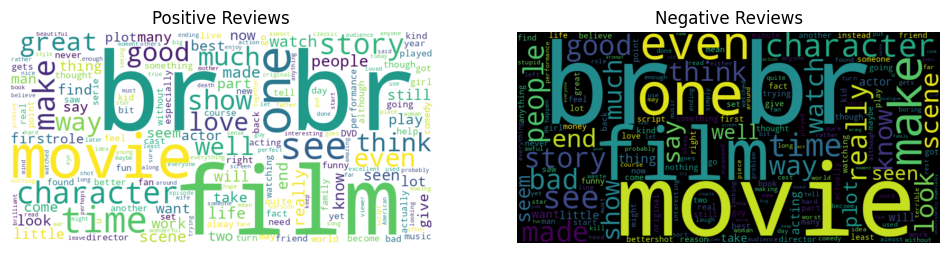

In [9]:
# Word Clouds for Positive vs Negative Reviews
pos_text = " ".join(df[df['sentiment']=="positive"]['review'].values)
neg_text = " ".join(df[df['sentiment']=="negative"]['review'].values)

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(neg_text)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews")

plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews")
plt.show()

In [10]:
# Preprocessing Functions
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"[^a-zA-Z']", " ", text)
    text = " ".join([word for word in text.split()
                     if word not in stop_words])
    return text

df['clean_review'] = df['review'].apply(clean_text)
df[['review', 'clean_review']].head()

,review,clean_review
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically there's family little boy jake think...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei's love time money visually stunn...


In [11]:
# explore stopword removal impact
sample_idx = 0
original = df['review'].iloc[sample_idx]
cleaned = df['clean_review'].iloc[sample_idx]

print("BEFORE preprocessing:")
print(original[:300])
print(f"Word count: {len(original.split())}")

print("\n" + "="*80 + "\n")

print("AFTER preprocessing (cleaned + stopwords removed):")
print(cleaned[:300])
print(f"Word count: {len(cleaned.split())}")

reduction = len(original.split()) - len(cleaned.split())
percent = (reduction / len(original.split())) * 100
print(f"\n✓ Removed {reduction} words ({percent:.1f}% reduction)")

BEFORE preprocessing:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Tru
Word count: 307


AFTER preprocessing (cleaned + stopwords removed):
one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum secur
Word count: 164

✓ Removed 143 words (46.6% reduction)


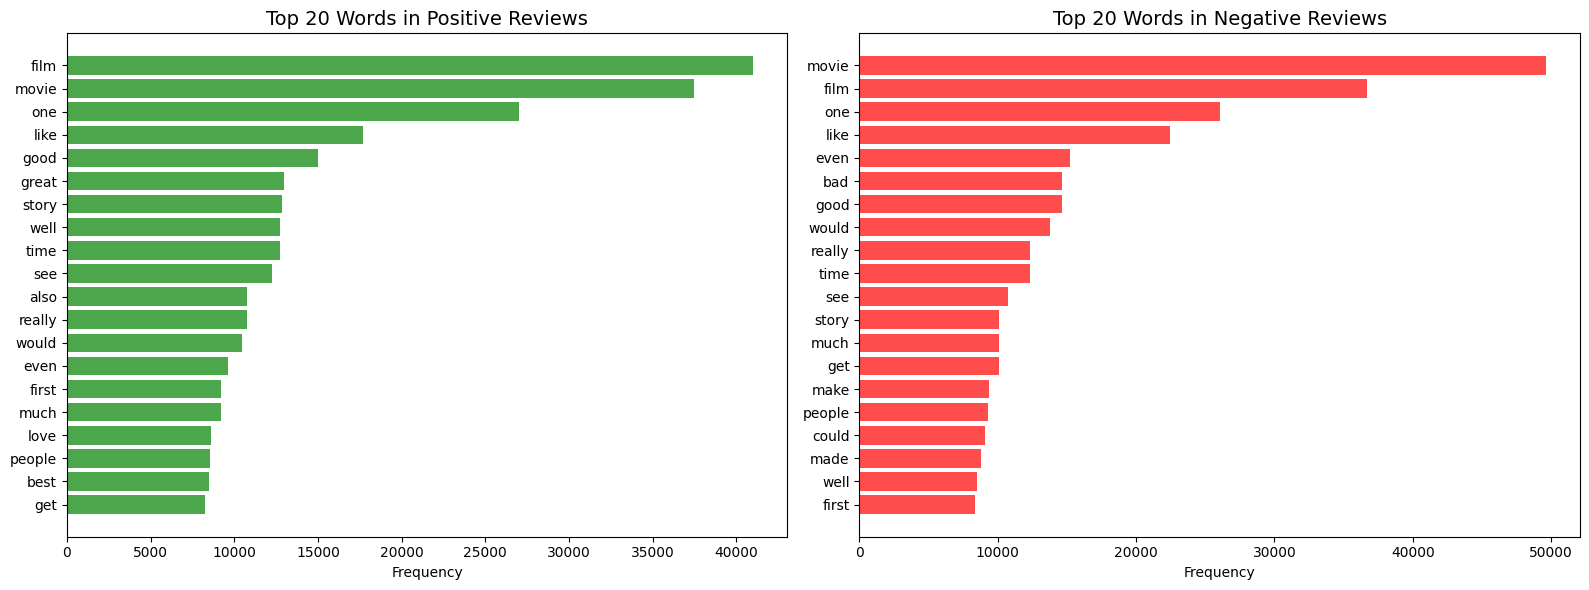

In [12]:
# Top Words Comparison
from collections import Counter


pos_words = ' '.join(df[df['sentiment']=='positive']['clean_review']).split()
neg_words = ' '.join(df[df['sentiment']=='negative']['clean_review']).split()


pos_freq = Counter(pos_words).most_common(20)
neg_freq = Counter(neg_words).most_common(20)


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


axes[0].barh([word for word, count in pos_freq], [count for word, count in pos_freq], color='green', alpha=0.7)
axes[0].set_title('Top 20 Words in Positive Reviews', fontsize=14)
axes[0].set_xlabel('Frequency')
axes[0].invert_yaxis()


axes[1].barh([word for word, count in neg_freq], [count for word, count in neg_freq], color='red', alpha=0.7)
axes[1].set_title('Top 20 Words in Negative Reviews', fontsize=14)
axes[1].set_xlabel('Frequency')
axes[1].invert_yaxis()


plt.tight_layout()
plt.show()

### Split Data

In [13]:
# data Split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['sentiment'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, stratify=train_df['sentiment'], random_state=42)

print("Train:", train_df.shape, "Validation:", val_df.shape, "Test:", test_df.shape)

Train: (36000, 4) Validation: (4000, 4) Test: (10000, 4)


## Feature Engineering

In [14]:
# feature enginnering using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(train_df['clean_review']).toarray()
X_val_tfidf = tfidf.transform(val_df['clean_review']).toarray()
X_test_tfidf = tfidf.transform(test_df['clean_review']).toarray()

y_train = train_df['sentiment']
y_val = val_df['sentiment']
y_test = test_df['sentiment']

print("TF-IDF shapes:", X_train_tfidf.shape, X_val_tfidf.shape, X_test_tfidf.shape)

TF-IDF shapes: (36000, 5000) (4000, 5000) (10000, 5000)


In [15]:
# feature engineering using embedding
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

train_tokens = [word_tokenize(text) for text in train_df['clean_review']]
val_tokens = [word_tokenize(text) for text in val_df['clean_review']]
test_tokens = [word_tokenize(text) for text in test_df['clean_review']]

w2v_model = Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=2, workers=4)

def get_sentence_vector(tokens, model, vector_size=100):
    vec = np.zeros(vector_size)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    return vec / count if count > 0 else vec

X_train_w2v = np.array([get_sentence_vector(tokens, w2v_model, 100) for tokens in train_tokens])
X_val_w2v = np.array([get_sentence_vector(tokens, w2v_model, 100) for tokens in val_tokens])
X_test_w2v = np.array([get_sentence_vector(tokens, w2v_model, 100) for tokens in test_tokens])

print("Word2Vec shapes:", X_train_w2v.shape, X_val_w2v.shape, X_test_w2v.shape)

Word2Vec shapes: (36000, 100) (4000, 100) (10000, 100)
